In [2]:
import numpy as np
import xarray as xr
import xskillscore as xs

In [ ]:
FORECAST = "***BASEDIR***/runs/infer/outputs/2021-09-07/14-28-19/normal_normal_monthly.nc"
OBS = "***BASEDIR***/last-validation-files-from-organizers/forecast-like-observations_2020_biweekly_terciled.nc"
REFERENCE = "***BASEDIR***//last-validation-files-from-organizers/ML_prediction_2020.nc"

reference = xr.open_dataset(REFERENCE)

In [ ]:
FORECAST = "***BASEDIR***/ml-output/2021-08-30/normal_normal_monthly-without-validtime.nc"
OBS = "***BASEDIR***2/from-template-lfs/hindcast-like_observations_2000-2019_biweekly_terciled.nc"

reference_t2m = xr.open_dataset('***BASEDIR***/training-output-benchmark/t2m.nc')
reference_tp = xr.open_dataset('***BASEDIR***/training-output-benchmark/tp.nc')
reference = xr.merge([reference_t2m, reference_tp])

In [ ]:
FORECAST = "***BASEDIR***/runs/infer/outputs/2021-09-16/16-01-21/bayes_conv_512.nc"
OBS = "***BASEDIR***/last-validation-files-from-organizers/forecast-like-observations_2020_biweekly_terciled.nc"
REFERENCE = "***BASEDIR***//last-validation-files-from-organizers/ML_prediction_2020.nc"

reference = xr.open_dataset(REFERENCE)

In [3]:
FORECAST = "***BASEDIR***/runs/infer/outputs/2021-09-15/11-03-14/bayes_conv.nc"
OBS = "***BASEDIR***/last-validation-files-from-organizers/forecast-like-observations_2020_biweekly_terciled.nc"

reference = xr.open_dataset(REFERENCE)

In [4]:
FORECAST = "***BASEDIR***/runs/infer/outputs/2021-09-28/18-15-38/emos_mix.nc"
OBS = "***BASEDIR***/last-validation-files-from-organizers/forecast-like-observations_2020_biweekly_terciled.nc"
REFERENCE = "***BASEDIR***//last-validation-files-from-organizers/ML_prediction_2020.nc"
OTHER = '***BASEDIR***/runs/infer/outputs/2021-09-27/11-47-01/bayes_eccc_ncep.nc'


reference = xr.open_dataset(REFERENCE)

In [ ]:
reference

In [5]:
def make_climatology():
    clim = xr.DataArray([1/3, 1/3, 1/3], dims='category', coords={'category':['below normal', 'near normal', 'above normal']}).to_dataset(name='tp')
    clim['t2m'] = clim['tp']
    
    return clim

In [6]:
def compute_arlan_rpss(forecast_rps, clim_rps):
    """
    Compute RPSS according to Arlan's definition
    """

    weights = np.cos(np.deg2rad(np.abs(clim_rps.latitude)))

    latitude_longitude_sum_ML = (forecast_rps) * weights
    latitude_longitude_sum_clim = (clim_rps) * weights

    return 1 - latitude_longitude_sum_ML/latitude_longitude_sum_clim

In [7]:
forecast = xr.open_dataset(FORECAST)

In [8]:
obs = xr.open_dataset(OBS)

In [9]:
reference = reference.sel(forecast_time=forecast.forecast_time)

In [10]:
other = xr.open_dataset(OTHER)

In [11]:
emos = xr.open_dataset('***BASEDIR***/runs/infer/outputs/2021-09-07/14-28-19/normal_normal_monthly.nc')

In [13]:
rps_emos = xs.rps(obs, emos,  category_edges=None, dim='forecast_time', input_distributions='p')
rps_ml = xs.rps(obs, forecast, category_edges=None, dim='forecast_time', input_distributions='p')         
rps_clim = xs.rps(obs, make_climatology(), category_edges=None, dim='forecast_time', input_distributions='p')
rps_ref = xs.rps(obs, reference, category_edges=None, dim='forecast_time', input_distributions='p')
rps_other = xs.rps(obs, other, category_edges=None, dim='forecast_time', input_distributions='p')

In [ ]:
rps_ml.isel(lead_time=0).tp.plot()

In [ ]:
rps_emos.mean(dim=['latitude', 'longitude'])

In [ ]:
rps_ml.mean(dim=['latitude', 'longitude'])

In [ ]:
rps_clim.mean(dim=['latitude', 'longitude'])

In [ ]:
rps_ref.mean(dim=['latitude', 'longitude'])

In [16]:
rpss_ours_other = compute_arlan_rpss(rps_ml, rps_other)

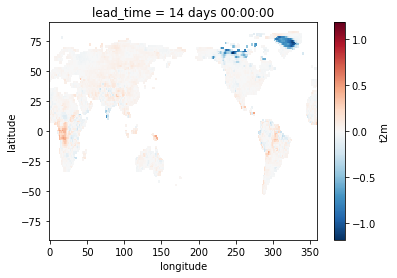

In [23]:
rpss_ours_other.isel(lead_time=0).t2m.plot()

In [ ]:
rps_ml

In [ ]:
rpss_ours_clim.t2m.isel(lead_time=0).plot()

In [ ]:
rpss_ours_reference = compute_arlan_rpss(rps_ml, rps_ref)

In [ ]:
rpss_ours_reference.tp.isel(lead_time=0).plot()

In [ ]:
rpss_ours_emos = compute_arlan_rpss(rps_ml, rps_emos)

In [ ]:
rpss_ours_emos.tp.isel(lead_time=0).plot()

In [ ]:
rpss_ours_emos.mean(dim=['latitude', 'longitude'])

In [ ]:
rps_clim.isel(lead_time=0).sel(latitude=slice(90,-60)).tp.plot()

In [ ]:
rpss_ours_clim

In [ ]:
rpss_ours_clim.t2m.isel(lead_time=1).plot()

In [ ]:
1.0 - (rps_ml.sum(dim=['latitude', 'longitude']) / rps_ref.sum(dim=['latitude', 'longitude']))

In [ ]:
rpss_ours_emos.t2m.sel(latitude=slice(90,-60)).plot(size=4, aspect=2, col='lead_time')

In [ ]:
rps_ml.tp.isel(lead_time=1).plot()

In [ ]:
rpss_ours_clim.tp.sel(latitude=slice(90,-60)).plot(size=4, aspect=2, col='lead_time')

In [ ]:
rpss_ours_clim.isel(lead_time=0).tp.plot()

In [ ]:
rpss_ours_reference.isel(lead_time=0).t2m.plot()

In [ ]:
rps_ref.isel(lead_time=0).t2m.plot()

In [ ]:
rpss.isel(lead_time=0).t2m.plot()

In [ ]:
reference.t2m.isel(lead_time=0, category=0, forecast_time=0)

In [ ]:
rps_ref.isel(lead_time=0).t2m.plot()

In [ ]:
rps_ml.mean()

In [ ]:
rps_ml.t2m.isel(lead_time=1).plot()

In [ ]:
rps_clim.t2m.isel(lead_time=1).plot()

In [ ]:
1.0 - (rps_ml.sum(dim=['latitude', 'longitude']) / rps_clim.sum(dim=['latitude', 'longitude']))

In [ ]:
rps_ml.mean(dim=['latitude', 'longitude'])

In [ ]:
rps_clim.mean(dim=['latitude', 'longitude'])